# 第1章 : 正規分布
## 正規分布

In [16]:
import numpy as np

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2) )
    return y

## 正規分布の可視化

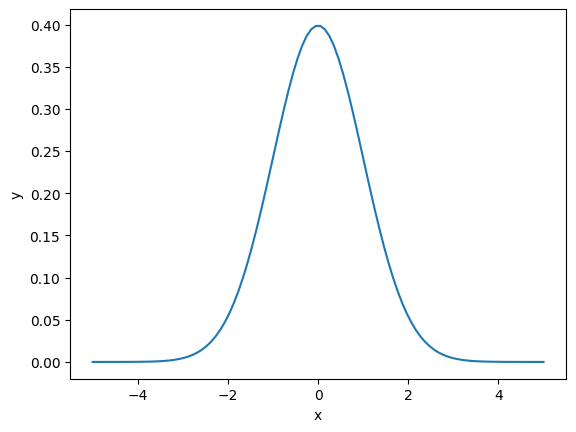

In [17]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 平均の変更

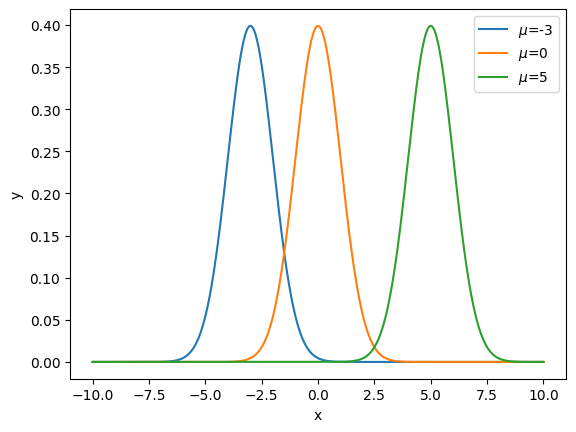

In [18]:
x = np.linspace(-10, 10, 1000)

y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label='$\mu$=-3')
plt.plot(x, y1, label='$\mu$=0')
plt.plot(x, y2, label='$\mu$=5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 分散の変更

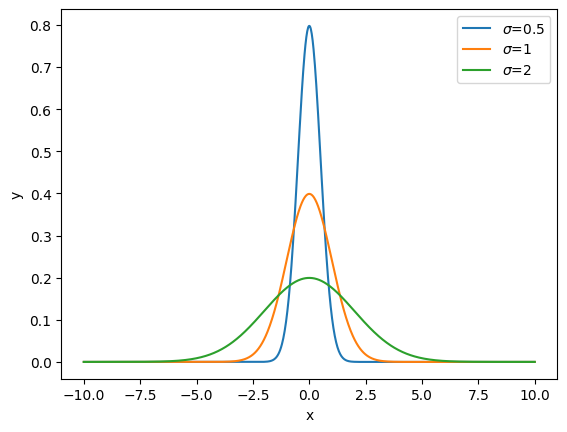

In [19]:
y0 = normal(x, mu=0, sigma=0.5)
y1 = normal(x, mu=0, sigma=1)
y2 = normal(x, mu=0, sigma=2)

plt.plot(x, y0, label='$\sigma$=0.5')
plt.plot(x, y1, label='$\sigma$=1')
plt.plot(x, y2, label='$\sigma$=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 中心極限定理の実験

### 中心極限定理とは
- 任意の確率分布 $p\left(x\right)$ からサンプリングした $N$ 点の平均 $\bar{x} := \{x^{\left(1\right)}, x^{\left(2\right)}, \cdots, x^{\left(N\right)}\}$は、$N$ が十分大きいときに平均が $\mu$, 分散が $\frac{\sigma^2}{N}$ の正規分布$\mathcal{N}\left(\mu, \frac{\sigma^2}{N}\right)$になる。

### $\bar{x}$ の計算

In [20]:
import numpy as np

N = 3 # サンプルサイズ
xs = []
for n in range(N):
    x = np.random.rand() # 一様分布からの乱数
    xs.append(x)

x_mean = np.mean(xs)
print(x_mean)

0.45938626387564924


### 実験

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def experiment(N):
    x_means = []

    for _ in range(100000):
        xs = []
        for n in range(N):
            x = np.random.rand() # 一様分布からのサンプル
            xs.append(x)
        mean = np.mean(xs)
        x_means.append(mean)

    # グラフの描画
    plt.hist(x_means, bins='auto', density=True)
    plt.title(f'N={N}')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0, 5)
    plt.show()

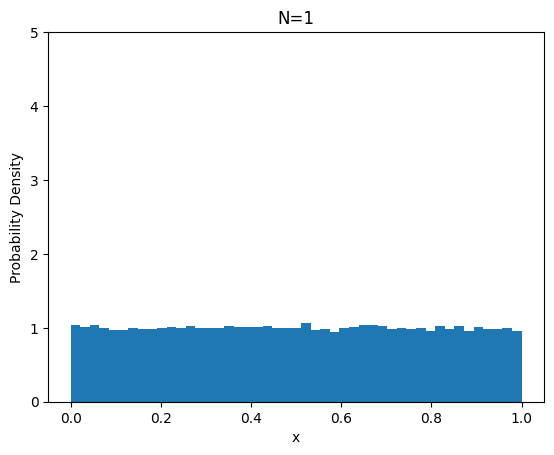

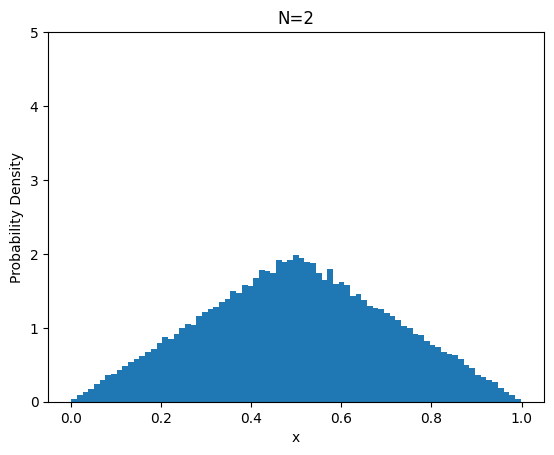

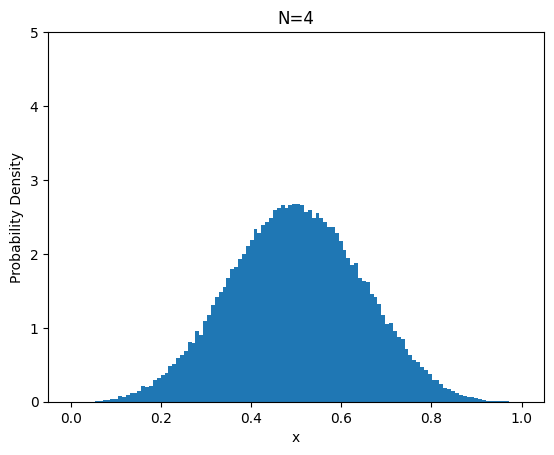

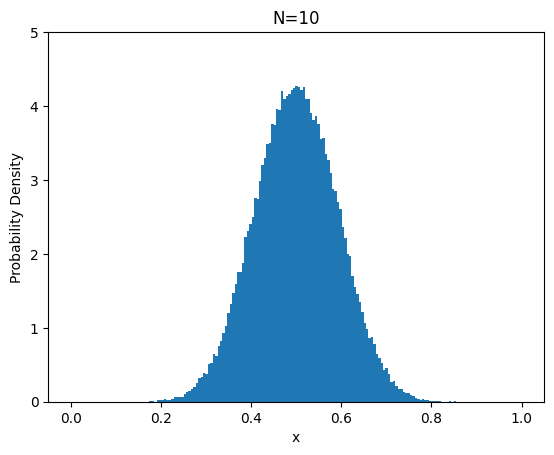

In [22]:
experiment(1) # サンプルサイズ1
experiment(2) # サンプルサイズ2
experiment(4) # サンプルサイズ4
experiment(10) # サンプルサイズ10

## サンプル和の期待値と分散
- 中心極限定理を考えると、サンプル和は $\mathcal{N}\left(N\mu, N\sigma^2\right)$に近づく

### 実験

- [0,1]の一様分布(平均$\frac{1}{2}$, 分散$\frac{1}{12}$)のサンプル和の分布と、正規分布$\mathcal{N}\left(\frac{N}{2}, \frac{N}{12}\right)$との比較

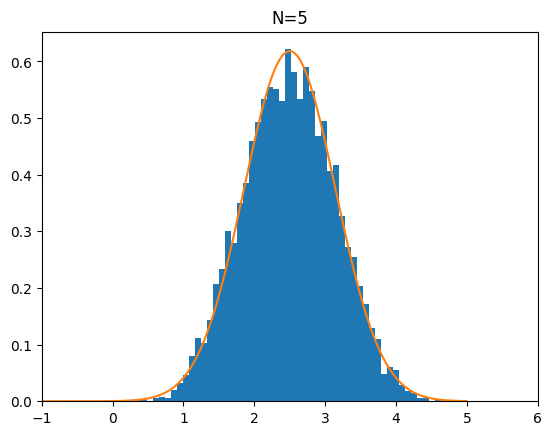

In [24]:
import numpy as np
import matplotlib.pyplot as plot

def experiment_sum(N):
    x_sums = []
    for _ in range(10000):
        xs = []
        for n in range(N):
            x = np.random.rand() # 一様分布からの乱数
            xs.append(x)
        t = np.sum(xs) # 和を計算
        x_sums.append(t)
    
    x_norm = np.linspace(-5, 5, 1000)
    mu = N / 2
    sigma = np.sqrt(N / 12)
    y_norm = normal(x_norm, mu, sigma)

    # グラフの描画
    plt.hist(x_sums, bins='auto', density=True)
    plt.plot(x_norm, y_norm)
    plt.title(f'N={N}')
    plt.xlim(-1, 6)
    plt.show()

experiment_sum(5)